## Was ist eigentlich lineare Regression?

Ein Beispiel zu Beginn:

Wir haben eine Menge zwei-dimensionaler Datenpunkte gegeben. Wir wollen einen (lineare) Funktion f finden, die - über alle denkbaren linearen Funktionen - ein bestimmtes Fehlermaß minimiert.

Gegeben sind folgende Daten:

| Kind $i$               | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
| ---------------------- |-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Fernsehzeit $x_i$      | 0.3 | 2.2 | 0.5 | 0.7 | 1.0 | 1.8 | 3.0 | 0.2 | 2.3 |
| Dauer Tiefschlaf $y_i$ | 5.8 | 4.4 | 6.5 | 5.8 | 5.6 | 5.0 | 4.8 | 6.0 | 6.1 |

Wir haben zu jedem Kind also zwei Merkmale erhoben, nämlich die tägliche durchschnittliche Fernsehzeit und die durchschnittliche Dauer des Tiefschlafs. Über wieviele Tage hinweg dies erhoben wurde, wissen wir nicht.

Das Merkmal Fernsehzeit werden wir mit x bezeichnen, das Merkmal Tiefschlaf mit y.   

[ 0.3  2.2  0.5  0.7  1.   1.8  3.   0.2  2.3] [ 5.8  4.4  6.5  5.8  5.6  5.   4.8  6.   6.1]


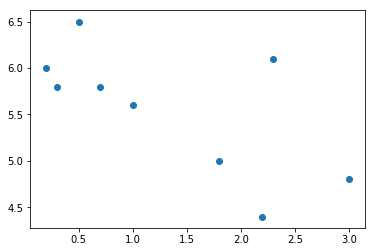

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([ [0.3, 5.8], [2.2, 4.4], [0.5, 6.5], [0.7, 5.8],
    [1.0, 5.6], [1.8, 5.0], [3.0, 4.8], [0.2, 6.0], [2.3, 6.1]])

x = data[:,0] # Get value in all tuples at position 0 (=Fernsehzeit)
y = data[:,1] # Get value in all tuples at position 1 (=Dauer Tiefschlaf)

plt.scatter(x,y) # I will never understand the idea behind being forced to unzip the data ...
plt.show()

Zu beiden Datenreihen kann man den Mittelwert bestimmen:

In [18]:
n = len(x) # or len(y), both have the same length

x_avg = sum(x) / n
y_avg = sum(y) / n

print("x: ",x," Average: ",x_avg)
print("y: ",y," Average: ",y_avg)

# we could as well use the function "mean" from np directly:
print("\nMean x: ",np.mean(x),", Mean y: ",np.mean(y))

x:  [ 0.3  2.2  0.5  0.7  1.   1.8  3.   0.2  2.3]  Average:  1.33333333333
y:  [ 5.8  4.4  6.5  5.8  5.6  5.   4.8  6.   6.1]  Average:  5.55555555556

Mean x:  1.33333333333 , Mean y:  5.55555555556


Beide Datenreihen weichen von ihren Mittelwerten ab. Im Grunde wollen wir nun mittels einen 
linearen Zusammenhangs erklären, welche Abweichung wir für ein Merkmal zu erwarten haben, wenn wir
das andere Merkmal abweichen lassen. Wir werden uns fragen, was wir für einen y-Wert zu erwarten haben, 
wenn wir einen x-Wert vorgeben. Wir könnten aber auch von y ausgehen und x "vorhersagen" wollen.

Wenn man von den Mittelwerten aus denkt, dann kann man sich folgendes fragen: wenn ein $x_i$ um eine gewisse Differenz vom Mittelwert abweicht, wieviel Abweichung sollten wir dann für $y_i$ erwarten?

Bestimmen wir einmal die Abweichungen und zeichnen diese:

[-1.03333333  0.86666667 -0.83333333 -0.63333333 -0.33333333  0.46666667
  1.66666667 -1.13333333  0.96666667]
[ 0.24444444 -1.15555556  0.94444444  0.24444444  0.04444444 -0.55555556
 -0.75555556  0.44444444  0.54444444]


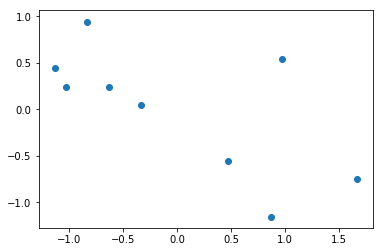

In [22]:
x_diff = np.add(x,-x_avg)
print(x_diff)
y_diff = np.add(y,-y_avg)
print(y_diff)

plt.scatter(x_diff,y_diff)
plt.show()

Der Plot sieht noch genau so aus, wie oben, wir haben nur die x und y-Werte so verschoben, dass sie jetzt um den Nullpunkt $(0,0)$ streuen. Diesen Daten haben jetzt einen veränderten Average: es ist für beide Dimensionen (fast genau) $0$:

In [23]:
print("\nMean x_diff: ",np.mean(x_diff),", Mean y_diff: ",np.mean(y_diff))


Mean x_diff:  7.40148683083e-17 , Mean y_diff:  9.86864910778e-17


Fragen wir uns nun einmal, in welchem Verhältnis die Abweichungen zu einander stehen:

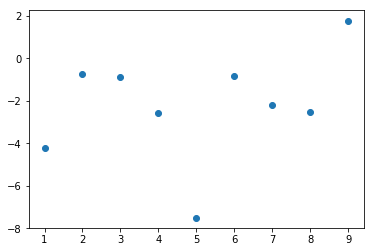

Mean ratio:  -2.19676743425


In [32]:
ratios = [a/b for a,b in zip(x_diff,y_diff)]

# Show the result
index = range(1,n+1)
plt.scatter(index,ratios)
plt.show()

mean_ratio = np.mean(ratios)
print("Mean ratio: ", mean_ratio)

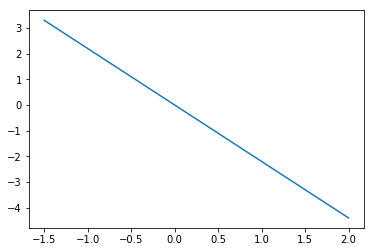

In [40]:
# Now, we define a simple linear function which captures the "average" relation between x and y

def lin_func(x):
    return x * mean_ratio

# Let's plot it between -1.5 and 2
f_x = np.linspace(-1.5,2,100)
f_y = np.vectorize(lin_func)(f_x)

# print(f_x,f_y)

plt.plot(f_x,f_y)
plt.show()

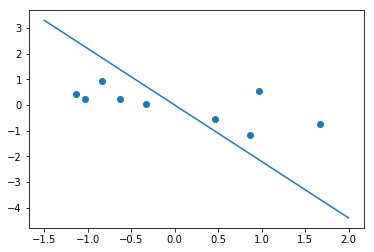

In [41]:
# Let's see how this relates to our "corrected" input data
plt.plot(f_x,f_y)
plt.scatter(x_diff,y_diff)
plt.show()

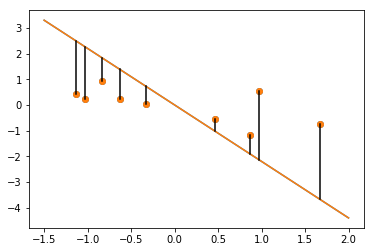

In [142]:
# With error bars
plt.plot(f_x,f_y)
plt.scatter(x_diff,y_diff)

for x_v,y_v in zip(x_diff,y_diff):
    plt.plot((x_v,x_v),(lin_func(x_v),y_v), 'k-')

plt.show()

Der mean_ratio, den wir oben bestimmen, gibt an, um wieviel y relativ zu x "im Mittel" variert, wenn x sich verändert. Ändert sich x beispielsweise um 1, dann ändert sich y ungefähr um -2.19. Ein steigendes x führt also zu fallendem y, mehr Fernsehzeit führt also zu (deutlich) reduzierter Tiefschlafzeit (denn die Einheit ist an sich identisch, eine Stunde mehr Fernsehen führt "im Mittel" zu mehr als 2 Stunden WENIGER Tiefschlaf. Aua.

Was bedeutet unsere Formulierung "im Mittel" oben eigentlich? Wir haben einfach jede Ration ausgerechnet, diese aufaddiert und  durch n=9 geteilt. Macht das wirklich Sinn? Schaut man sich den Graphen oben an, in dem die Ratios eingezeichnet sind, dann sieht man, dass es einen ziemlich großen "Ausreisser" gibt (mit einem Wert nahe an -8), der den Mittelwert stark beeinflusst. Fragen wir uns einmal, ob es einen "bessere" lineare Funktion geben könnte, um die Beziehung zwischen x und y zu "linearisieren".

Um das Wort "besser" in den Griff zu bekommen, müssen wir uns zunächst fragen, wie wir den Fehler messen wollen, den unsere lineare Funktion macht.

Erste Idee: wir nehmen die tatsächliche Abweichung der Vorhersage vom beobachteten Wert, wir rechnen:

${\hat y\_{diff}_{i}} = lin\_func(x\_{diff}_{i})$

Es gibt aber meist eine Differenz zwischen dem Vorhersagewert ${\hat y\_{diff}_{i}}$ und dem "wahren" Wert $y\_{diff}_{i}$. Diese Differenz bezeichnen wir als Fehler $\epsilon_{i}$.

Insgesamt ergibt sich eine Fehlersumme von

${Error} = \sum ({y\_diff}_{i} - {\hat y\_{diff}_{i}}) = \sum (y\_{diff}_{i} - lin\_func(x\_{diff}_{i})) = \sum \epsilon_{i}$

Welcher Fehler ergibt sich nun für unsere gefundene lineare Funktion?


In [42]:
e_y = [(b - lin_func(a)) for a,b in zip(x_diff,y_diff)]

print(e_y)

[-2.0255485709435308, 0.74830955412468314, -0.88619508409424519, -1.1468415972449599, -0.68781136697103162, 0.46960258042611125, 2.9057235015218246, -2.0452253143681736, 2.6679862975493247]


Jetzt entsteht ein Problem: wenn wir nun einfach die positive und negativen Abweichungen aufaddieren, heben diese sich gegenseitig auf. Im Extremfall könnten wir dann eine sehr verwackelelte, sich aber sehr gut ausgleichende Vorhersage nicht von einer perfekten Vorhersage unterscheiden, beide hätten möglicherweise einen kummulierten Fehler von 0 (man könnte damit immer noch leben, wenn man zusäztlich die Varianz des Fehlers erheben würde, aber wir wollen erstmal nur eine Zahl haben, die uns erlaubt, den Fehler halbwegs ordentlich "auf einen Blick" einzuschätzen.

Gehen wir also zur zweiten Idee über, die Summe der Beträge der Fehler, also der absolute Fehler:

${Error} = \sum |{y\_diff}_{i} - {\hat y\_{diff}_{i}}| = \sum |y\_{diff}_{i} - lin\_func(x\_{diff}_{i})| = \sum |\epsilon_{i}|$


In [48]:
import math

e_abs = [math.fabs(e) for e in e_y]
print(e_abs)

absolute_error = sum(e_abs)
absolute_error_avg = absolute_error / n
print("\nAbsolute Error: ",absolute_error,", Average absolute error: ",absolute_error_avg)

[2.025548570943531, 0.7483095541246831, 0.8861950840942452, 1.14684159724496, 0.6878113669710316, 0.46960258042611125, 2.9057235015218246, 2.0452253143681736, 2.6679862975493247]

Absolute Error:  13.583243867243885 , Average absolute error:  1.5092493185826539


Welche lineare Funktion optimiert diesen Fehler? Finden wir es heraus!

In [70]:
def lin_func_m(x,gradient=mean_ratio):
    return x * gradient

def abs_error(x,y,func):
    err = [math.fabs(b - func(a)) for a,b in zip(x,y)]
    return sum(err)

from functools import partial

# our mean_ratio
ef_1 = partial(lin_func_m,gradient=mean_ratio) # Error function 1
print(abs_error(x_diff,y_diff,ef_1))

# ... one less
ef_2 = partial(lin_func_m,gradient=mean_ratio-1) # Error function 2
print(abs_error(x_diff,y_diff,ef_2))

# ... one more (which is BETTER!)
ef_3 = partial(lin_func_m,gradient=mean_ratio+1) # Error function 3
print(abs_error(x_diff,y_diff,ef_3))

13.583243867243885
21.51657720057722
5.886624758994519


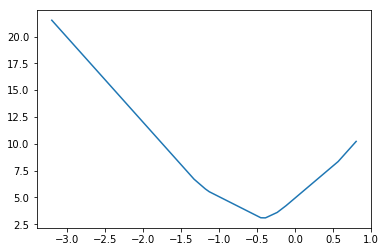

In [132]:
# Let's try this systematically
gradients = np.linspace(mean_ratio-1,mean_ratio+3,1000)
abs_errors = np.array([abs_error(x_diff,y_diff,partial(lin_func_m,gradient=g)) for g in gradients])

plt.plot(gradients,abs_errors)
plt.show()

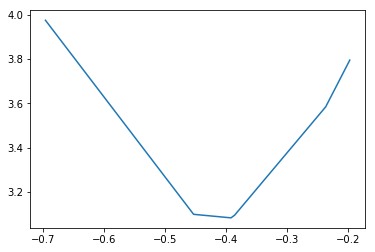

In [136]:
# Let's look near the optimum:
gradients = np.linspace(mean_ratio+1.5,mean_ratio+2.0,1000)
abs_errors = np.array([abs_error(x_diff,y_diff,partial(lin_func_m,gradient=g)) for g in gradients])

plt.plot(gradients,abs_errors)
plt.show()


Wir können das mit einem "Gradient Descent" genannten, iterativen Verfahren probieren. Die Idee ist einfach: was wir im Bild sehen, ist die Fehlerfunktion zu unserem absoluten Fehler, die vom vorgegebenen Gradienten, also der Steigung unser Geraden, die wir in den $(x_{diff},y_{diff})$-Raum legen, abhängt. Wir suchen in dieser Fehlerfunktion nach einem Minimum. Eine elementare Idee ist es, "irgendwo" zu beginnen und sich dann in Richtung des gesuchten Extremums zu bewegen. Das nennt man "hill climbing" (man sucht oft nach Maxima!), in unserem Fall hieße es besser "hill sliding" (wir suchen ja nach einem Minimum). Um sich in die richtige Richtung zu bewegen, muss man wissen, wie sich die Kurve am betrachteten Punkt verhält: wo geht es nach oben, wo nach unten? Das kann einem die Steigung der Kurve in diesem Punkt sagen. Man könnte nun analytisch differenzieren (werden wir noch tun werden), oder auch einfach in einer kleinen Umgebung um den Punkt die Steigung "erperimentell" bestimmen. Eigentlich brauchen wir sowieso gar nicht die Steigung, sondern müssen nur wissen, wo es kleiner und wo größer wird (falls es das wird...- sonst wird es ein wenig schwieriger).

Man kann das noch mit diversen mehr oder minder cleveren Ideen verbinden, z.B. weitere Testsprünge zulassen, binäre Suche integrieren etc. Wir machen es einfach "straightforward" in unserer ersten Lösung: wir variieren um eine fixe Schrittweite, und zwar solange, bis wir keine Verbesserung mehr finden:


In [106]:
def grad_descent(initial_value=0,step=0.1,bound=5):
    initial_v = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value))
    left_v    = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value - step))
    right_v   = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value + step))
    #print(left_v,initial_v,right_v)
    
    computed_while = 0
    
    # find the correct direction to start with    
    if left_v < initial_v:
        # go to the left side! (if both are better, 
        # still go only to the left! One could split here)
        step = -step
        last_v = left_v  
    elif right_v >= initial_v: 
        # no improvement! Best argument value has been found (given the step size that we tried)
        return initial_value
    else:
        # go to the right side
        last_v = right_v

    next_v = initial_value + step # we did one step already
    while True:
        next_v = next_v + step # take the next step                          
        test_v = abs_error(x_diff,y_diff,partial(lin_func_m,next_v))
        # print(next_v,":",test_v)
        # is it an improvement?
        if test_v < last_v:
            # Guard against running out-og-bounds
            if math.fabs((next_v + step) - initial_value) > bound:
                print("WARNING: we stopped iterating on the boundary! Might not be a true minimum!")
                print("While-Loops: ",computed_while)
                return next_v
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        else:
            print("While-Loops: ",computed_while," - Error value: ", last_v)
            return next_v - step # one step before the last step was better
        computed_while += 1 # counting the while loops
                           
print("Best gradient found with step size 1: ",grad_descent(initial_value=mean_ratio, step=1))
print("Best gradient found with step size 0.1: ",grad_descent(initial_value=mean_ratio, step=0.1))
print("Best gradient found with step size 0.01: ",grad_descent(initial_value=mean_ratio, step=0.01))
print("Best gradient found with step size 0.001: ",grad_descent(initial_value=mean_ratio, step=0.001))
print("Best gradient found with step size 0.0001: ",grad_descent(initial_value=mean_ratio, step=0.0001))
print("Best gradient found with step size 0.00001: ",grad_descent(initial_value=mean_ratio, step=0.00001))

While-Loops:  1  - Error value:  3.7950181284634947
Best gradient found with step size 1:  -0.196767434246
While-Loops:  17  - Error value:  3.0835824269101573
Best gradient found with step size 0.1:  -0.396767434246
While-Loops:  179  - Error value:  3.0835824269101577
Best gradient found with step size 0.01:  -0.396767434246
While-Loops:  1803  - Error value:  3.0825157602435254
Best gradient found with step size 0.001:  -0.392767434247
While-Loops:  18045  - Error value:  3.082355760243427
Best gradient found with step size 0.0001:  -0.392167434246
While-Loops:  180460  - Error value:  3.0823530935753114
Best gradient found with step size 0.00001:  -0.392157434241


Wir könnten die Funktion oben leicht generalisieren, in dem wir eine zu testende Error-Function als Parameter mit übergeben würden (und die zugehörigen Daten). Das machen wir später noch. Die sehr kleinen Schrittweiten werden schon ziemlich teuer, das könnten wir natürlich verbessern mit einer großen Schrittweite, die dann kleiner wird und die Richtung umschaltet, wenn es zu einer Verschlechterung kommt:

In [137]:
def grad_descent(initial_value=0,min_step=0.00001,max_step=1,bound=5):
    step = max_step
    
    initial_v = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value))
    left_v    = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value - step))
    right_v   = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value + step))
    #print(left_v,initial_v,right_v)
    
    computed_while = 0
    
    # find the correct direction to start with    
    if left_v < initial_v:
        # go to the left side! (if both are better, 
        # still go only to the left! One could split here)
        step = -step
    elif right_v >= initial_v: 
        # no improvement! Best argument value has been found (given the step size that we tried)
        return initial_value
    
    last_v = abs_error(x_diff,y_diff,partial(lin_func_m,initial_value + step))
    next_v = initial_value + step # we did one step already
    
    
    while True:
        last_grad = next_v
        next_v = next_v + step # take the next step                          
        test_v = abs_error(x_diff,y_diff,partial(lin_func_m,next_v))
        # print(next_v,":",test_v) # comment in to see the development of values
        # is it an improvement?
        if test_v < last_v:
            # Guard against running out-og-bounds
            if math.fabs((next_v + step) - initial_value) > bound:
                print("WARNING: we stopped iterating on the boundary! Might not be a true minimum!")
                print("While-Loops: ",computed_while)
                return next_v
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        else:
            # reduce stepsize, change direction
            step = -(step/10)            
            print("Changed step size and direction: ",step,"(",computed_while,")")
            if math.fabs(step) < min_step:
                print("While-Loops: ",computed_while," - Error value: ", last_v)
                return last_grad # one step before the last step was better
            # Accept something worse...
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        computed_while += 1 # counting the while loops
                           

print("Best gradient found: ",grad_descent(initial_value=mean_ratio, min_step=0.0000001))

Changed step size and direction:  -0.1 ( 1 )
Changed step size and direction:  0.01 ( 14 )
Changed step size and direction:  -0.001 ( 25 )
Changed step size and direction:  0.0001 ( 32 )
Changed step size and direction:  -1e-05 ( 49 )
Changed step size and direction:  1.0000000000000002e-06 ( 59 )
Changed step size and direction:  -1.0000000000000002e-07 ( 70 )
Changed step size and direction:  1.0000000000000002e-08 ( 76 )
While-Loops:  76  - Error value:  3.082352960243491
Best gradient found:  -0.392156934246


Mit dem grad_descent, der die Richtung und die Schrittweite wechselt, finden wir nach 76 Loops die folgende Lösung:

(Minimal) Error value: 3.082352960243491
Best gradient found:  -0.392156934246
    
Hierbei sind wir bis zu einer Schrittweite von 0.0000001 herunter gegangen. Gehen wir nur bis 0.00001 oder 0.000001 herunter, finden wir eine etwas schlechtere Lösung, als der andere Algo, das liegt aber eher an Rechenungenauiogkeiten, als an etwas anderem. Für den anderen Algo würde es im übrigen sehr, sehr teuer, auf die noch kleinere Schrittweite umzustellen.

Der erste Algo oben liefert nach 180460 das folgende, leicht schlechtere, Ergebnis:

While-Loops:  180460, Error value:  3.0823530935753114
Best gradient found with step size 0.00001:  -0.392157434241
                                             


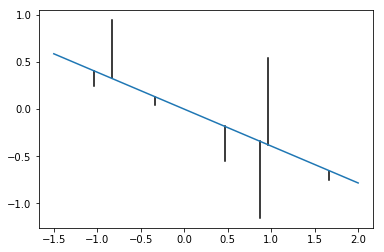

In [146]:
# "Optimal" gradient found so far
# Now, we define a simple linear function which captures the "average" relation between x and y

line = partial(lin_func_m,-0.392156934246)

# Let's plot it between -1.5 and 2
f_x = np.linspace(-1.5,2,100)
f_y = np.vectorize(line)(f_x)

for x_v,y_v in zip(x_diff,y_diff):
    plt.plot((x_v,x_v),(line(x_v),y_v), 'k-')

plt.plot(f_x,f_y)
plt.show()